**Write a python program to perform K-Means clustering on Breast Cancer Data**

#Import Libraries


In [1]:
import numpy as np 
import pandas as pd 
from sklearn import datasets
from sklearn.cluster import KMeans

# Prepare Data

In [3]:
dataset = datasets.load_breast_cancer()

print( dataset.data.shape )
print( dataset.target.shape )

#dataset

(569, 30)
(569,)


# K-Mean Model

In [6]:
kmeans = KMeans( n_clusters = 10, random_state = 11 )
prediction = kmeans.fit_predict( dataset.data )

#prediction

kmeans.cluster_centers_.shape

(10, 30)

#Scatter plot of the data points

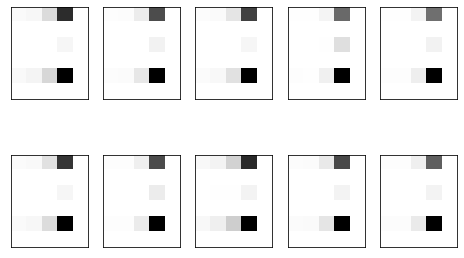

In [7]:
# Scatter plot of the data points
import matplotlib.pyplot as plt

fig, ax = plt.subplots( 2, 5, figsize = ( 8, 5 ) )
centers = kmeans.cluster_centers_.reshape( 10, 6, 5 )

for axi, center in zip( ax.flat, centers ):
  axi.set( xticks = [], yticks = [] )
  axi.imshow( center, interpolation = 'nearest', cmap = plt.cm.binary )

In [8]:
import numpy as np
from scipy.stats import mode

labels = np.zeros_like( prediction )
for i in range(10):
  mask = ( prediction == i )
  labels[mask] = mode( dataset.target[mask] )[0]

In [9]:
from sklearn.metrics import accuracy_score

accuracy_score( dataset.target, labels )

0.9068541300527241

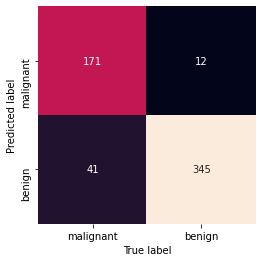

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix( dataset.target, labels )
ax = sns.heatmap( mat.T, square = True, annot = True, fmt = 'd', cbar = False, xticklabels = dataset.target_names, yticklabels = dataset.target_names )

#ax.set_ylim(10,10)
plt.xlabel('True label')
plt.ylabel('Predicted label');